In [55]:
# TASK QUESTIONS:
# 3.1.2: Which kernel achieved the best accuracy and F1 score?
#   Depends on shuffling. see code

from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,  f1_score, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
iris_data = load_iris()

In [57]:
state = 7 # Controls shuffling. Same value gives same splitting results
tr_data, te_data, tr_target, te_target = train_test_split(
    iris_data.data, iris_data.target, 
    test_size = 0.2, train_size = 0.8, 
    random_state = state
)

In [58]:
kernel_types = [ 'linear', 'poly', 'rbf' ]
class_types = [ '', 'ovo-', 'ovr-' ]
models = {}

# lin, poly, rbf
for ktype in kernel_types:
    models[ktype] = SVC(kernel=ktype)
    models[ktype].fit(tr_data, tr_target)

# one-vs-one
for ktype in kernel_types:
    models['ovo-'+ktype] = OneVsOneClassifier(models[ktype])
    models['ovo-'+ktype].fit(tr_data, tr_target)

# one-vs-rest
for ktype in kernel_types:
    models['ovr-'+ktype] = OneVsRestClassifier(models[ktype])
    models['ovr-'+ktype].fit(tr_data, tr_target)

In [59]:
# Confusion matrices

np.set_printoptions(precision=2)
debug_enable_plots = False

# '', 'ovo-' (one-vs-one), 'ovr-' (one-vs-rest)
model_type = 'ovr-'


def plotConfusionMatrix(kernel):
    if not debug_enable_plots: return

    kernel = model_type + kernel
    disp = ConfusionMatrixDisplay.from_estimator(
        models[kernel],
        te_data,
        te_target,
        display_labels=iris_data.target_names,
        cmap = plt.cm.Blues,
        normalize = 'true',
    )
    disp.ax_.set_title("Kernel = " + kernel)

plotConfusionMatrix('linear')
plotConfusionMatrix('poly')
plotConfusionMatrix('rbf')
plt.show()

In [60]:
# F1 + accuracy scores for kernels
debug_print_steps = False
debug_print_results = False

best_f1 = (0, None)
best_acc = (0, None)
for c in class_types:
    for k in kernel_types:
        k = c + k
        preds = models[k].predict(te_data)
        f1 = f1_score(te_target, preds, average='micro')
        acc = accuracy_score(te_target, preds)
        if acc > best_acc[0]: best_acc = (acc, k)
        if f1 > best_f1[0]: best_f1 = (f1, k)
        if debug_print_steps: print(k + " f1: " + str(f1) + "\n" + k + " acc: " + str(acc))

if debug_print_results: 
    print("===================== Best results")
    print("f1: " + str(best_f1) + "\nacc: " + str(best_acc))


In [61]:
# Extract support vectors
debug_print_ovr = False

def printOvR(kernel):
    for e in models['ovr-'+kernel].estimators_:
        if debug_print_ovr:
            print("===============================")
            print(e.support_vectors_)

printOvR('linear')

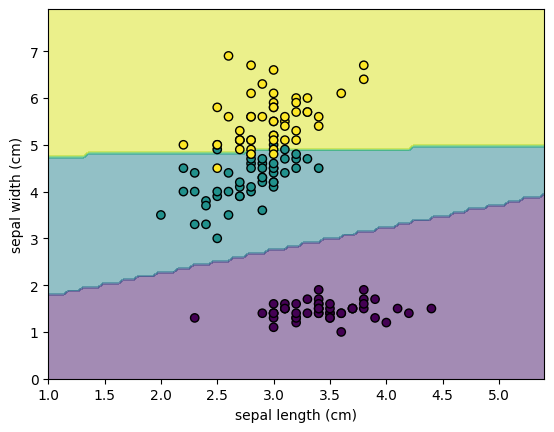

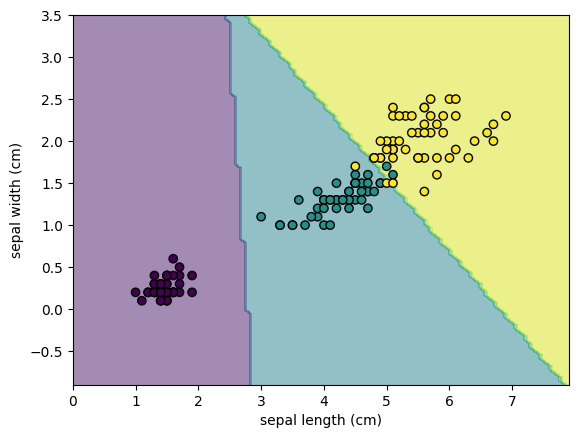

In [62]:
# Decision boundry
debug_plot_db = False

def plotDB(X):
    if not debug_plot_db: return

    m = LogisticRegression().fit(X, iris_data.target)
    disp = DecisionBoundaryDisplay.from_estimator(
        m, X, response_method="predict",
        xlabel = iris_data.feature_names[0], ylabel = iris_data.feature_names[1],
        alpha = 0.5
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=iris_data.target, edgecolor="k")


plotDB(iris_data.data[:, 1:3]) #  2vs3
plotDB(iris_data.data[:, 2:4]) # 3vs4
plt.show()
